In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn # to use latex style in matplotlib
import scienceplots
plt.style.use(['science','nature'])
#import tikzplotlib
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['PT Serif']


import sys
sys.path.append('../')
import aorta_lib.segmentation.data as segdata

import aorta_lib.hemodyn.data as data
import aorta_lib.hemodyn.train_and_analyze_ROM as tr


/opt/miniconda3/envs/monai/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
df = pd.read_excel('../aorta_lib/hemodyn/odir2/df_results_all_folds.xlsx', index_col=0)

## plot scatter error vs dist

/tmp/ipykernel_1381487/2312493714.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


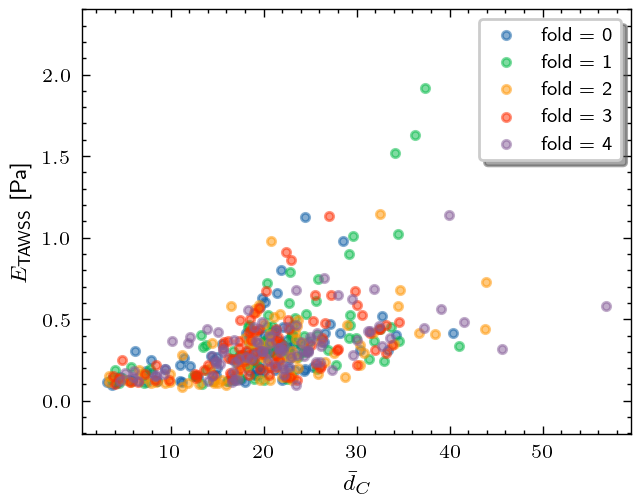

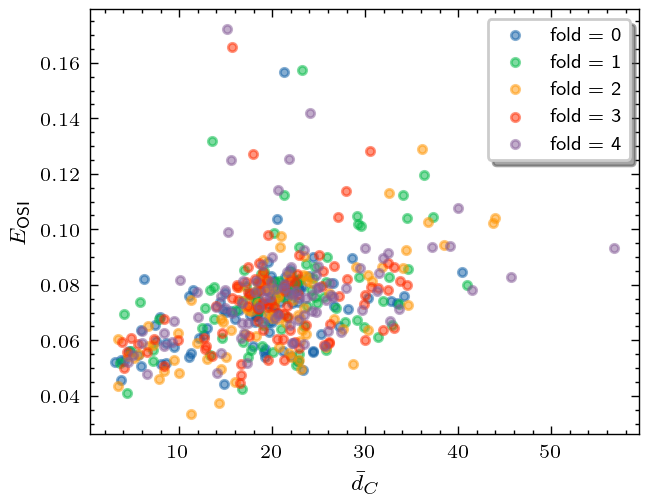

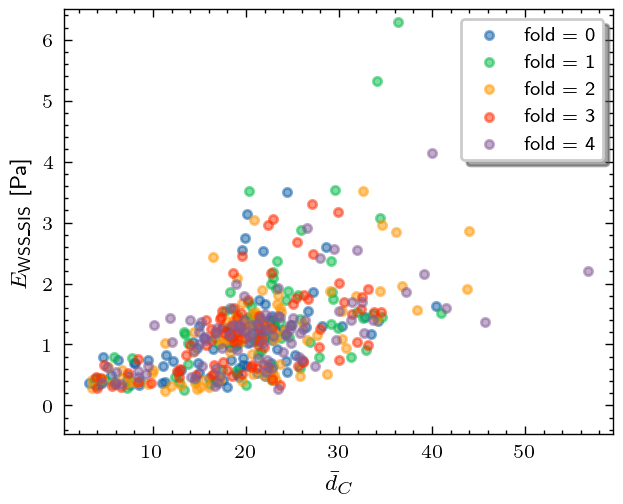

In [4]:
from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble='\\usepackage{amsmath}')
fontsize = 10
mpl.rcParams['font.size'] = fontsize

mpl.rcParams['font.size'] = 8
mpl.rcParams["axes.titlesize"] = 8
mpl.rcParams["axes.labelsize"] = 8

array_name_to_plot = ['tawss', 'osi', 'wss_sis']
lims = [[None,2.4],[None,None],[None,6.5]]
units = [' [Pa]', '', ' [Pa]']

figure_size = np.array((90,70)) * 0.0393701 # specify in mm and then convert to inches

for kk, array_name in enumerate(array_name_to_plot):
  #for j in range(1,6):
  for j in range(3,4):
    fig = plt.figure(figsize=figure_size, dpi=200)
    ax = fig.add_subplot()
    for i in range(5):
      df_ = df[df['array_name']==array_name]; df_ = df_[df_['fold']==i]
      ax.scatter(df_[f'dist{j}'], df_['abse'], alpha=0.5, label=f'fold = {i}')

    ax.set_xlabel('$\\bar{d}_C$')
    ax.set_ylabel('$E_{{\\text{{{}}}}}$'.format(array_name.upper())+units[kk])
    ax.set_ylim(lims[kk])
    ax.legend(shadow=True, frameon=True)
    fig.savefig(f'error_vs_dist_{array_name}.pdf', dpi=300)
    fig.show()

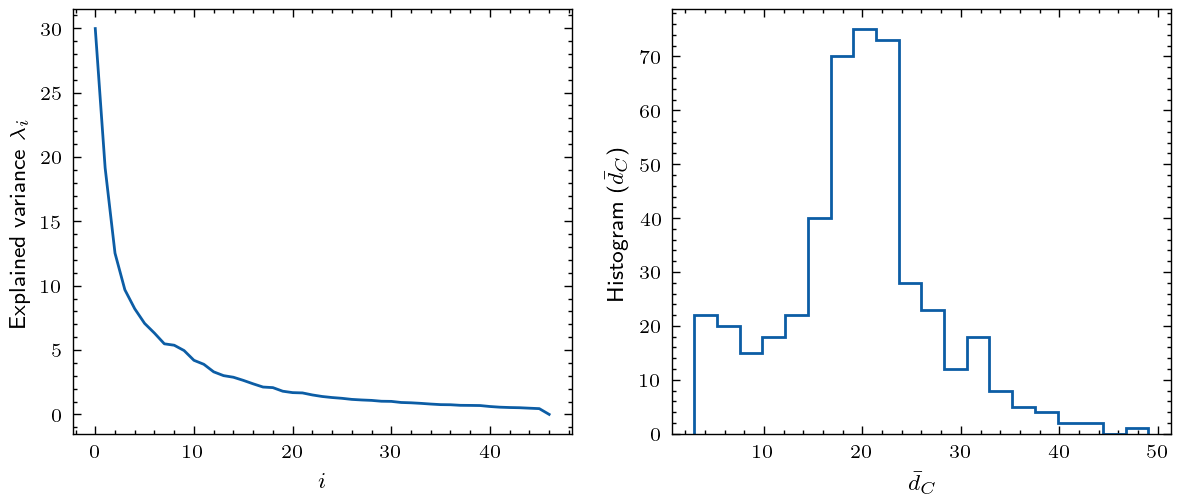

In [46]:
whole_dataset = data.read_datalist(
  '../aorta_lib/hemodyn/datasetROM_new.json', folds=range(5),
   dataRoot='alignedDatasetBiomarkers_new/', keys_to_edit=["model"],
)
for s in whole_dataset:
  s['omega'] = tr.read_shape_coeff_from_dict(s['coeffs'], 25)

df_whole = pd.DataFrame(whole_dataset)

omega_dataset = np.array([*df_whole.loc[:,'omega']])
dists, _ = tr.build_knn(omega_dataset, omega_dataset, tr.distance_shapes, k=4)
dists = dists[:,1:].mean(-1)
from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble='\\usepackage{amsmath}')
fontsize = 10
mpl.rcParams['font.size'] = fontsize

mpl.rcParams['font.size'] = 8
mpl.rcParams["axes.titlesize"] = 8
mpl.rcParams["axes.labelsize"] = 8

figure_size = np.array((180,70)) * 0.0393701 # specify in mm and then convert to inches
fig, axs = plt.subplots(1,2,figsize=figure_size, dpi=200)

axs[0].plot(tr.ssm_std)
axs[0].set_xlabel('$i$')
axs[0].set_ylabel('Explained variance $\\lambda_i$')
axs[1].hist(dists, bins=20, density=False, histtype='step')
axs[1].set_xlabel('$\\bar{d}_C$')
axs[1].set_ylabel('Histogram ($\\bar{d}_C$)')

fig.savefig('expl_var_and_dc_histogram.pdf', dpi=300)